**Particle in a 1D Box with Internal Barrier**

Numerical solution particle in a box (infinite potential barriers in the box edges).
The code assumed the particle is an electron and we use Atomic Units.
L'exemple que segueixo es el següent: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Quantum_Tutorials_(Rioux)/09%3A_Numerical_Solutions_for_Schrodinger's_Equation/9.15%3A_Particle_in_a_Box_with_an_Internal_Barrier

We start importing libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

We define a function with the potential for the Schrödinger Equation. In this case is zero everywhere but it can be modified easily by any function as you like:

In [4]:
#Potential as a function of position
def getV(x):
    lb= 0.45
    rb=0.55
    if x <= rb and x >= lb:
      potvalue= 100.0
    else:
      potvalue=0.0

    return potvalue

And now we define a function that calculates the matrix (denoted by F in the theoretical derivation) that encodes the Schrödinger Equation in finite diference form for n points from 0 to n-1

In [26]:
#Discretized Schrodinger equation in n points (FROM 0 to n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    nu= 1.5    # efective mass
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1/nu)
        if i > 0:
           F[i,i-1] = 1/nu
           if i < n-1:
              F[i,i+1] = 1/nu
    return F

Up to now, the code does nothing explicitly. We have just defined how to calculate the potential and how to calculate the matrix F

Let us now start the numerical solution, entering the parameters that we need: the discretization h and the size of the box.

In [27]:
# Interval for calculating the wave function [-L/2,L/2]
L = 1
xlower = 0
xupper = L

#Discretization options
h = 0.001  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 1001 grid points.


Now we can calculate F explicitly and diagonalize. The result of the diagonalization is **not ordered** so we have to order the results (energies and wavefunctions) by energy values.

In [28]:
#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

Print **Energy Results** and compare with Exact analytical result:

In [29]:
#Energy Levels
E = - w/(2.0*h**2)
for k in range(0,6):
  E_exact=(float(k+1)*(np.pi))**2.0/(2.0*L*L)
  print("n=",k,", E(numeric)=%.4f" %E[k],', E(exact)='+'{:.4f}'.format(E_exact))

n= 0 , E(numeric)=11.5649 , E(exact)=4.9348
n= 1 , E(numeric)=13.6605 , E(exact)=19.7392
n= 2 , E(numeric)=45.6658 , E(exact)=44.4132
n= 3 , E(numeric)=54.5629 , E(exact)=78.9568
n= 4 , E(numeric)=101.2527 , E(exact)=123.3701
n= 5 , E(numeric)=122.4734 , E(exact)=177.6529


Now let us show the Wavefunctions obtained in the diagonalization process

Plotting


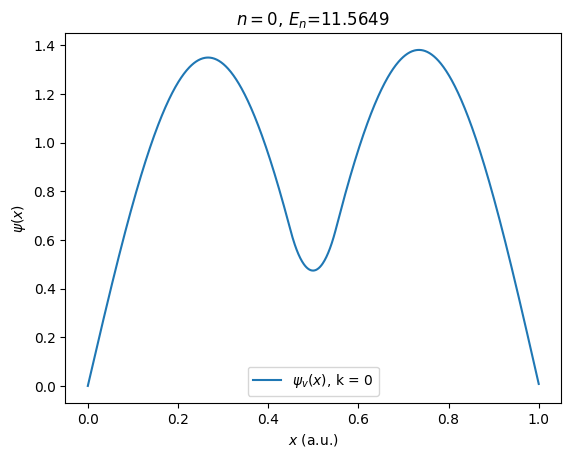

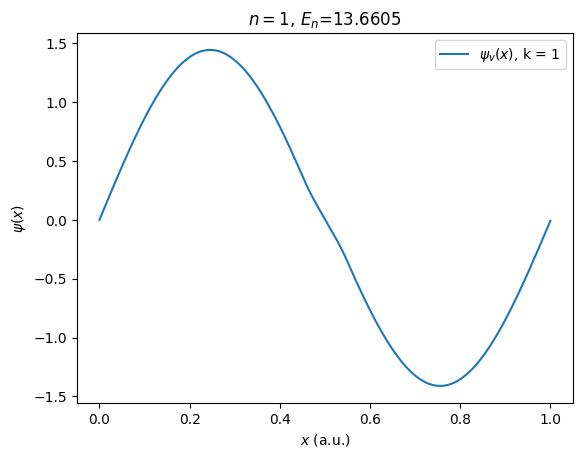

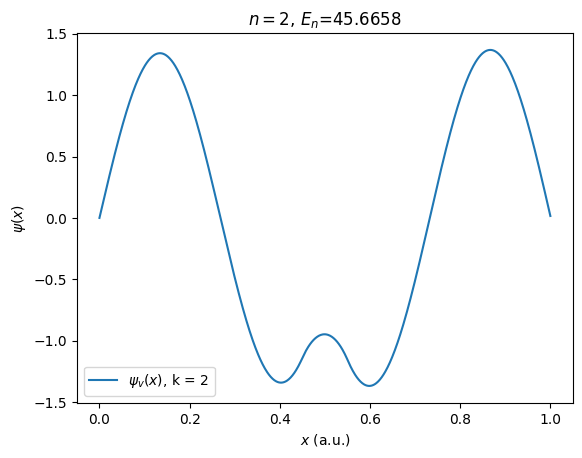

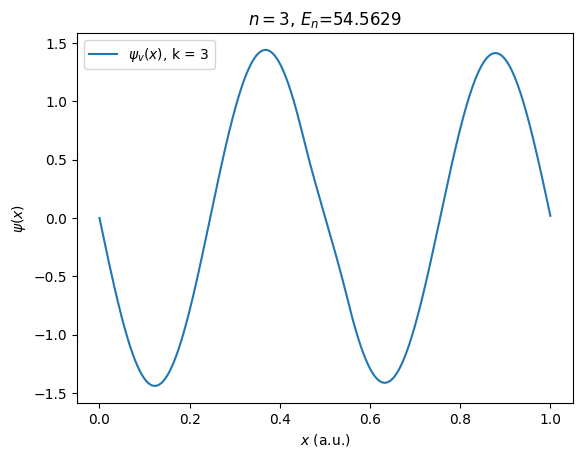

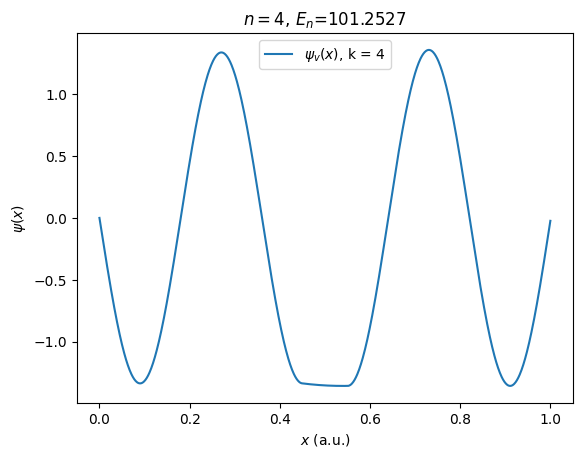

Bye


In [30]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,5):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()

print("Bye")


**Notes mentre faig la practica.**

massa efectiva = 1

h= 0.01 apareix una asimetria en els grafics --> pq? doncs no ho se // energies: nombres enters correcte, part decimal incorrecte

h= 0.001 sembla que ara ja surt simetric // energies: el valor decimal s'apropa molt mes al del exemple

h= 0.005 torna la asimetria // energies: els decimals es separen dels del exemple  // temps calcul immediat

h= 0.0009 torna la asimetria // energies: decimals s'apropen molt als del exemple

h= 0.0005 torna la simetria // energies: la primera dona exacte, les altres s'apropen molt al exemple // temps calcul augmenta

h= 0.0003 es mante la simetria // energies: s'apropen pero no son exactes, la primera disminueix // temps de calcul +1 min

massa efectiva = 0.5

h= 0.001 es mante la simetria // energies: s'apropa moltissim la primera, caldra fer mes probes desde casa

massa efectiva = 1.5

h= 0.001 es mante la simetria // energies: s'apropa moltissim la primera, caldra fer mes probes desde casa